# EECS192 Spring 2016Track Finding from 1D line sensor data

In [1]:
# changed to use 8 bit compressed line sensor values
# data format: 128 comma separated values, last value in line has space, not comma
# line samples are about 10 ms apart

In [2]:
%pylab

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [95]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.ndimage as ndi  # useful for 1d filtering functions
from scipy.signal import gaussian
from scipy.optimize import curve_fit

# comment the following line to have external plots
%matplotlib inline

In [96]:
# Graphing helper function
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

Line scan plotting function.


In [97]:
def plot_frame(linearray):
    nframes = np.size(linearray)/128
    n = range(0,128)
    print 'number of frames', nframes
    print 'size of line', np.size(linearray[0,:])
    for i in range(0, nframes-1):
        setup_graph(title='$x[n]$', x_label='$n$', y_label='row'+str(i)+' $ xa[n]$', fig_size=(15,2))
        plt.subplot(1,3,1)
        _ = plt.plot(n,linearray[0,:])
        plt.subplot(1,3,2)
        _ = plt.plot(n,linearray[i,:])
    # plot simple difference between frame i and first frame
        plt.subplot(1,3,3)
        _ = plt.plot(n,linearray[i,:] - linearray[0,:])
        plt.ylabel('Frame n - Frame 0')

### grayscale plotting of line function:


In [98]:
CAMERA_LENGTH = 128
INTENSITY_MIN = 0
INTENSITY_MAX = 255
def plot_gray(fig, camera_data):
  # x fencepost positions of each data matrix element
  x_mesh = []
  for i in range(0, len(camera_data)+1):
    x_mesh.append([i-0.5] * (CAMERA_LENGTH + 1))
  x_mesh = np.array(x_mesh)
  
  # y fencepost positions of each data matrix element
  y_array = range(0, CAMERA_LENGTH + 1)
  y_array = list(map(lambda x: x - 0.5, y_array))
  y_mesh = np.array([y_array] * (len(camera_data)+1))
    
  data_mesh = np.array(camera_data)
  vmax1 = np.max(data_mesh)
  data_mesh = INTENSITY_MAX * data_mesh/vmax1  # normalize intensity
  fig.set_xlim([-0.5, len(camera_data) - 0.5])
  fig.set_ylim([-8.5, CAMERA_LENGTH - 0.5])

  fig.pcolorfast(x_mesh, y_mesh, data_mesh,
      cmap='gray', vmin=INTENSITY_MIN, vmax=INTENSITY_MAX,
      interpolation='None')

In [183]:
### inputs:
# linescans - An array of length n where each element is an array of length 128. Represents n frames of linescan data.

### outputs:
# track_center_list - A length n array of integers from 0 to 127. Represents the predicted center of the line in each frame.
# track_found_list - A length n array of booleans. Represents whether or not each frame contains a detected line.
# cross_found_list - A length n array of booleans. Represents whether or not each fram contains a crossing.

def find_track(linescans):
    n = len(linescans)
    track_center_list = n * [64]
    track_found_list = n * [True]
    cross_found_list = n * [False]
    
    ### Code to be added here
    ###
    ###
    
    
    
    curr = linescans[0]
    #normalize
    curr = curr - min(curr)
    curr = curr / max(curr) * 255
    
    #make a base gaussian for center
    c_gauss = gaussian(128,6) * 255
    
    #get starter 'best' values
    bestDiff = sys.maxint
    bestCGauss = c_gauss
    bestCIndex = 0
    
    #find center
    for i in range(128):
        wat = np.concatenate((c_gauss[i+64:128], c_gauss[0:i+64]), axis=0)
        diff = curr - wat
        s = sum(diff**2)
        if s<bestDiff:
            bestDiff = s
            bestCGauss = wat
            bestCIndex = 128-i
        #plot(wat)
    
    plot(curr)
    plot(bestCGauss)
    
    
    return track_center_list, track_found_list, cross_found_list

number of frames 501


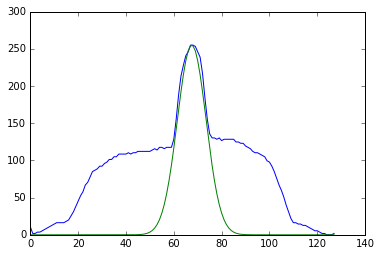

In [184]:
#linea = np.genfromtxt('ee192_sp14_camera_testdata_a.csv', delimiter=",")
linea = np.genfromtxt('inner_step_cir18002300.csv', delimiter=",")
nframes = np.size(linea)/128
print 'number of frames', nframes
 
linescans = [] 
for i in range(0, nframes): 
    line = linea[i,0:128]
    linescans.append(line)

track_center_list, track_found_list, cross_found_list = find_track(linescans)
#for i, (track_center, track_found, cross_found) in enumerate(zip(track_center_list, track_found_list, cross_found_list)):
    #print 'scan # %d center at %d. Track_found = %s, Cross_found = %s' %(i,track_center,track_found, cross_found)

### Set A linescans

line1: [  26.   21.   21.   22.   22.   23.   24.   25.   26.   27.   28.   29.
   29.   29.   29.   30.   31.   34.   37.   41.   45.   49.   52.   57.
   59.   63.   67.   68.   69.   71.   71.   73.   74.   76.   76.   78.
   78.   80.   80.   80.   80.   81.   80.   81.   81.   82.   82.   82.
   82.   82.   82.   83.   84.   83.   85.   85.   84.   85.   85.   85.
   91.  106.  124.  138.  146.  153.  156.  161.  161.  160.  156.  152.
  140.  122.  106.   95.   92.   92.   91.   92.   90.   91.   91.   91.
   91.   91.   89.   89.   88.   88.   86.   85.   84.   82.   81.   81.
   80.   79.   78.   75.   74.   71.   67.   62.   57.   53.   48.   42.
   37.   32.   29.   29.   28.   28.   27.   27.   26.   25.   24.   23.
   23.   22.   21.   21.   20.   20.   20.   21.]
line2: [  26.   21.   21.   22.   22.   23.   24.   25.   26.   27.   28.   29.
   29.   29.   29.   30.   31.   34.   37.   42.   45.   49.   53.   57.
   60.   63.   67.   68.   69.   72.   72.   74.   76.   77.

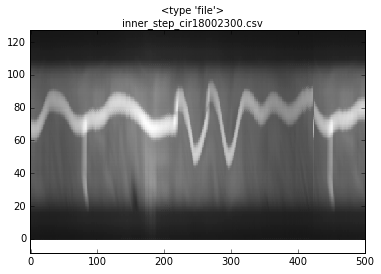

In [11]:
n = range(0,129)
#linea = np.genfromtxt('ee192_sp14_camera_testdata_a.csv', delimiter=",")
filename = 'inner_step_cir18002300.csv'
#linea = np.genfromtxt('inner_step_cir1800-2300.csv', delimiter=",")
linea = np.genfromtxt(filename, delimiter=",")
#linea = np.genfromtxt('extract-lines.txt', delimiter=",")
line1 = linea[0,:]
print 'line1:',line1
line2=linea[1,:]
print 'line2:',line2
#plot_frame(linea)
print linea.shape

plt.suptitle("%s\n%s" % (file, filename))     
ax = plt.subplot(1, 1, 1)
plot_gray(ax, linea)

### Set B line scans

In [ ]:
#lineb = np.genfromtxt('extract-lines.txt', delimiter=",")
filename='inner_step_cir150500.csv'
lineb = np.genfromtxt(filename, delimiter=",")
#plot_frame(lineb)
line1 = lineb[0,:]
print line1
plt.suptitle("%s\n%s" % (file, filename))     
ax = plt.subplot(1, 1, 1)
plot_gray(ax, lineb)

### Set C linescans

In [ ]:
filename='inner_step_cir5001000.csv'
#linec = np.genfromtxt('inner_step_cir500-1000.csv', delimiter=",")
linec = np.genfromtxt(filename, delimiter=",")
line1 = linec[0,:]
print line1
#plot_frame(linec)
plt.suptitle("%s\n%s" % (file, filename))     
ax = plt.subplot(1, 1, 1)
plot_gray(ax, linec)